# <center>Audio Emotion Recognition</center>
## <center>Part 1 - Data Exploration & Feature Extraction </center>

# Introduction 

- We are going to build an audio emotion classifier,using the TESS dataset,which consists of 7 different types of emotions to classify the audio files into.Each emotion category has about 200 audio recordings of a particular emotion.The 7 different types of emotions are recorded by two age groups of people who are 26 and 64 years respectively.

- We are going to use the Librosa library to first analyse the dataset followed by its feature Extraction using the same to build an emotion classifer.

# Importing The Required Libraries.

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_tip_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_keg_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pole_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_puff_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_such_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_mob_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toron

/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_vote_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_team_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_hit_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_soap_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_lot_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_road_disgust.wav
/kaggle/input/toronto-emotional-speech-set-tess/

/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_rain_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_base_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_thumb_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_dime_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_lose_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_fail_neutral.wav
/kaggle/input/toronto-emotional-speech-set-te

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_half_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_fat_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_puff_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_hit_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_raid_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_beg_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_chat_neutral.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_bought_neutral.wav
/kaggle/input/toronto-emotional-speech-se

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_neat_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_came_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_loaf_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_mop_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_hush_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_cab_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dead_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_ton_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_

In [7]:
TESS = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"

dir_list = os.listdir(TESS)
dir_list[0:14]

['YAF_sad',
 'YAF_pleasant_surprised',
 'OAF_Pleasant_surprise',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'OAF_angry',
 'OAF_Sad',
 'YAF_happy',
 'OAF_Fear',
 'YAF_fear',
 'OAF_disgust',
 'YAF_neutral']

The files are encoded as -

__OAF__ - Older Age Female <br>
__YAF__ - Younger Age Female

##  <center> TESS dataset Analysis <center>

Its got the same 7 key emotions we're interested in. But what is slightly different about this dataset compared to the previous SAVEE and RAVDESS dataset , is that the addition of 'pleasant surprise' emotion.I am going to work with the assumption for now that its a pleasant surprise. If we find out from post modelling, surpise is highly inaccurate, we can come back and modify our assumption here. 

#### Combined the two different types of audio files into a single folder.

In [8]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_angry       400
female_neutral     400
female_happy       400
female_surprise    400
female_fear        400
female_disgust     400
female_sad         400
Name: labels, dtype: int64

In [12]:
TESS_df

,labels,source,path
0,female_sad,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
1,female_sad,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
2,female_sad,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
3,female_sad,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
4,female_sad,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
...,...,...,...
2795,female_neutral,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
2796,female_neutral,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
2797,female_neutral,TESS,/kaggle/input/toronto-emotional-speech-set-tes...
2798,female_neutral,TESS,/kaggle/input/toronto-emotional-speech-set-tes...


### Explore the data

400 files for each key emotion(old + young). Now lets take 2 audio files, play it and plot it to see what we're dealing with. Lets do them in alphabetical order.

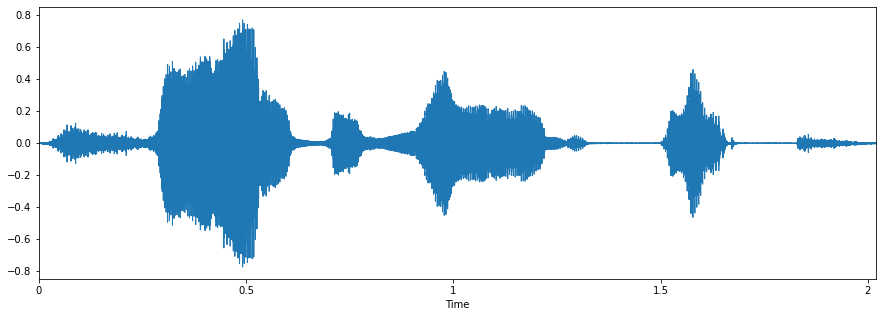

In [24]:
# lets play a angry young track 
fname = TESS + 'YAF_angry/YAF_book_angry.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

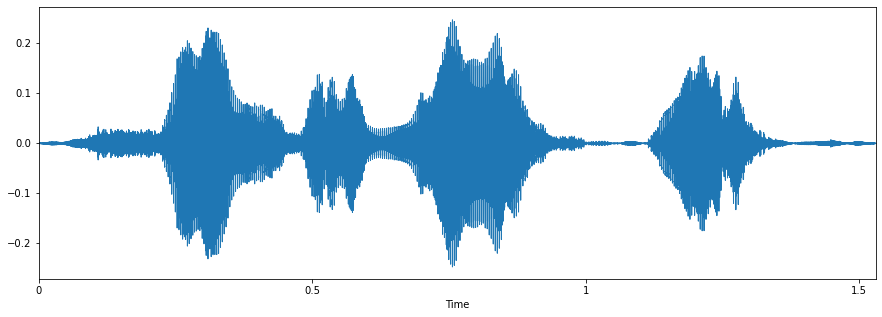

In [25]:
# lets play a angry old track 
fname = TESS + 'OAF_angry/OAF_book_angry.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

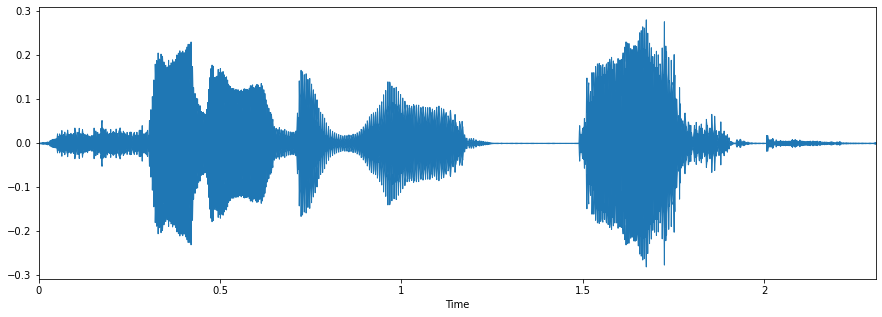

In [26]:
# lets play a disgust young track 
fname = TESS + 'YAF_disgust/YAF_book_disgust.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

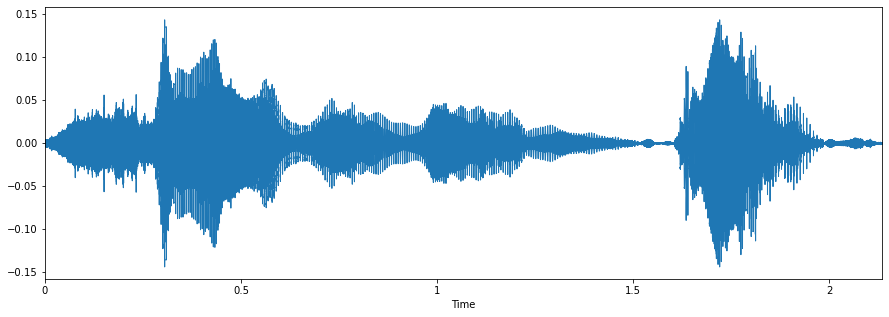

In [27]:
# lets play a disgust old track 
fname = TESS + 'OAF_disgust/OAF_book_disgust.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

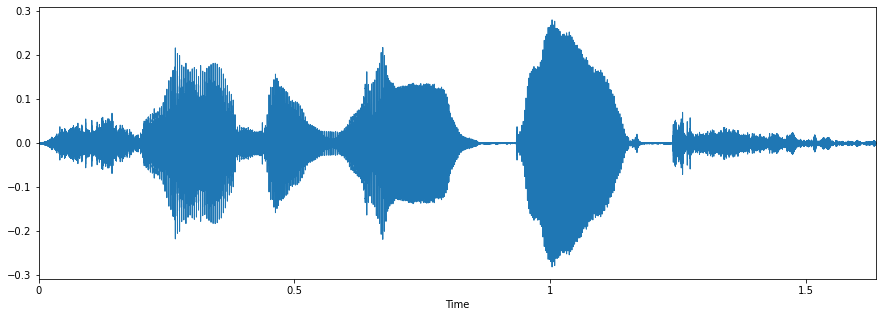

In [28]:
# lets play a fear young track 
fname = TESS + 'YAF_fear/YAF_book_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

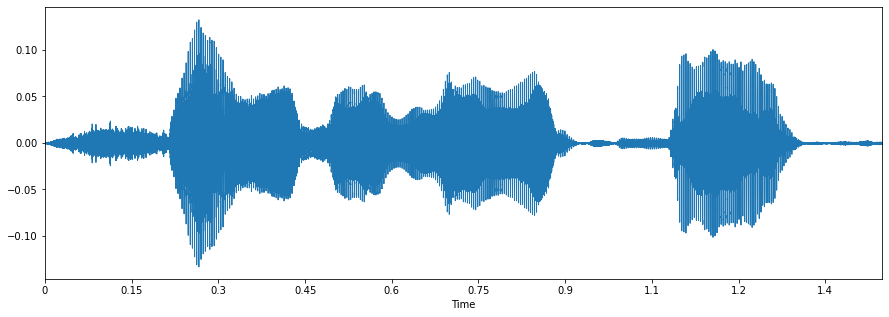

In [29]:
# lets play a fear old track 
fname = TESS + 'OAF_Fear/OAF_book_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

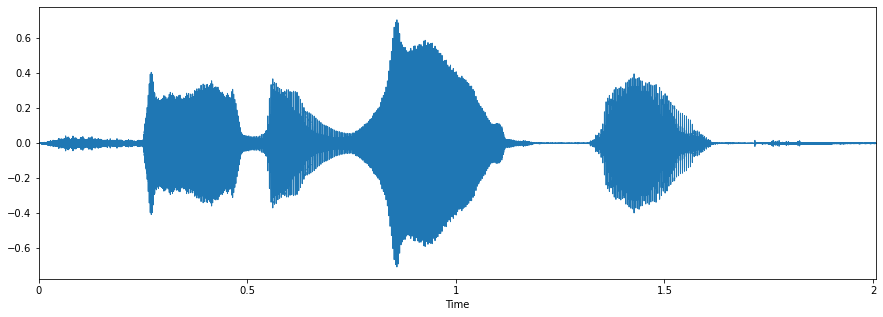

In [30]:
# lets play a happy young track 
fname = TESS + 'YAF_happy/YAF_book_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

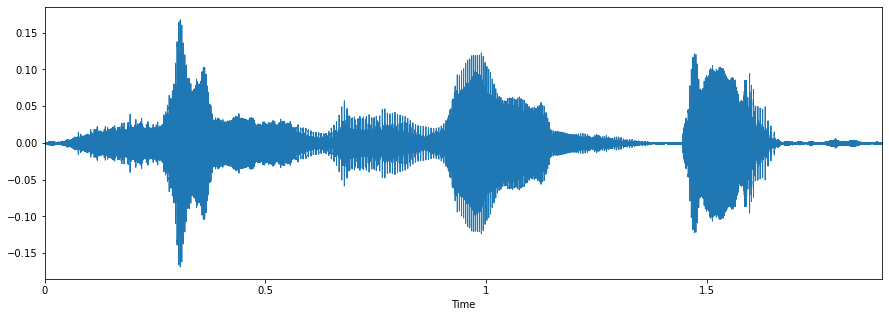

In [31]:
# lets play a happy old track 
fname = TESS + 'OAF_happy/OAF_book_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

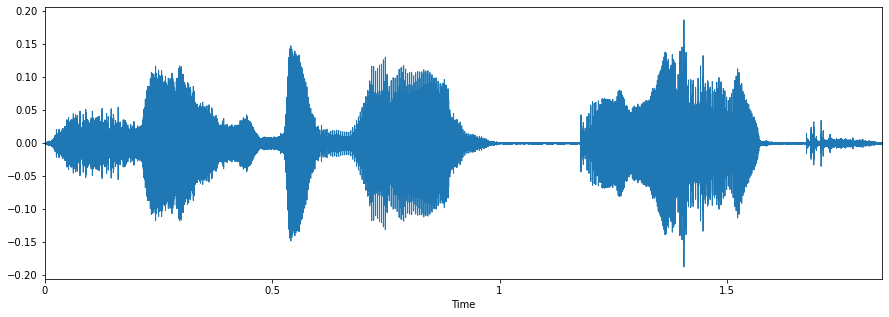

In [34]:
# lets play a Pleasant surprise young track 
fname = TESS + 'YAF_pleasant_surprised/YAF_book_ps.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

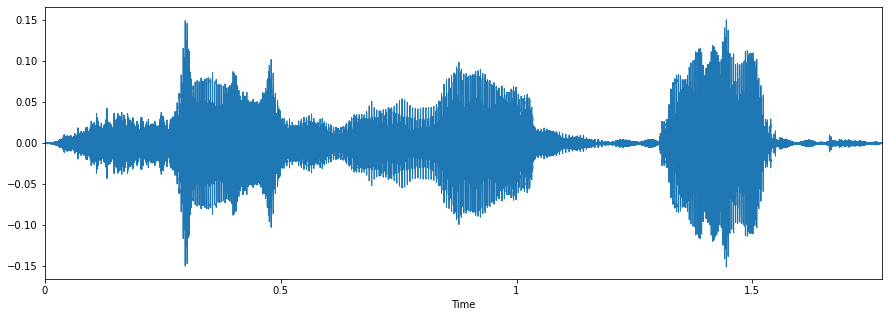

In [33]:
# lets play a  Pleasant surprise old track 
fname = TESS + 'OAF_Pleasant_surprise/OAF_book_ps.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

## Some conclusions after hearing all the audios of different types and seeing some of the waveplots 

- The young woman's voice  was is crystal clear in expressing the emotions and even by listening to those audios ,we can classify them manually,so it would be pretty easy for the model to classify the younger voice.
- The problem arises when we listen to the older woman's voice,it can be easily distinguished between the younger voice,but if we listen to two different emotions of the older voice,there is negligible difference between them,it is pretty bad .We have do somehing to the females voice.